In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [44]:
from sklearn.metrics import plot_confusion_matrix

In [4]:
model = RandomForestClassifier(random_state=1, max_depth=15)

In [7]:
data=pd.read_csv("data/model_numeric.csv", index_col=None)

In [8]:
data1=pd.read_csv("data/modeling_numeric.csv", index_col=None)

In [9]:
data2=pd.read_csv("data/modeling_numeric2.csv", index_col=None)

In [13]:
data.head()

,Winner,weight_class,no_of_rounds,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,...,"('R_Open_Stance',)","('R_Orthodox',)","('R_Sideways',)","('R_Southpaw',)","('R_Switch',)","('B_Open_Stance',)","('B_Orthodox',)","('B_Sideways',)","('B_Southpaw',)","('B_Switch',)"
0,1,4.0,5.0,4.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,3.0,5.0,3.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,8.0,3.0,3.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,4.0,3.0,4.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,12.0,3.0,1.0,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
data.dropna(axis=0, how='any', inplace=True)

In [15]:
data.shape

(3307, 146)

In [12]:
data.drop(columns=[ "title_bout","B_current_lose_streak","R_current_lose_streak"], inplace=True)

In [16]:
X=data.drop('Winner',axis=1,inplace=False)
y = data['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [17]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, random_state=1)

In [18]:
model.score(X_test, y_test)

0.649546827794562

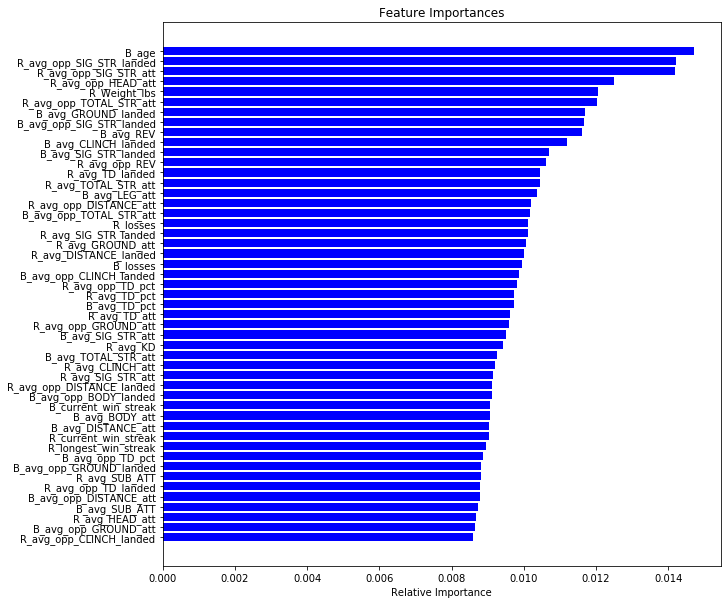

In [19]:
features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-49:]  # top 30 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [22]:
data1.head()

,Winner,weight_class,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,...,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_diff_red-blue,height_diff_red-blue
0,1,4,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,...,0.050000,110.500000,43.300000,162.56,162.56,135.0,31.0,32.0,0.0,-5.08
1,1,3,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,...,0.147143,158.142857,82.285714,165.10,167.64,125.0,32.0,31.0,0.0,-2.54
2,1,8,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,...,0.131333,102.133333,38.600000,180.34,193.04,155.0,36.0,35.0,0.0,-5.08
3,0,4,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,10.500000,...,0.000000,115.125000,48.875000,162.56,172.72,135.0,26.0,29.0,0.0,-7.62
4,0,12,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,0.000000,0.000000,...,0.000000,60.500000,27.750000,187.96,190.50,264.0,32.0,26.0,14.0,7.62


In [21]:
data1.drop(columns=[ "title_bout"], inplace=True)

In [23]:
X=data1.drop('Winner',axis=1,inplace=False)
y = data1['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

In [24]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, random_state=1)

In [25]:
model.score(X_test, y_test)

0.6646525679758308

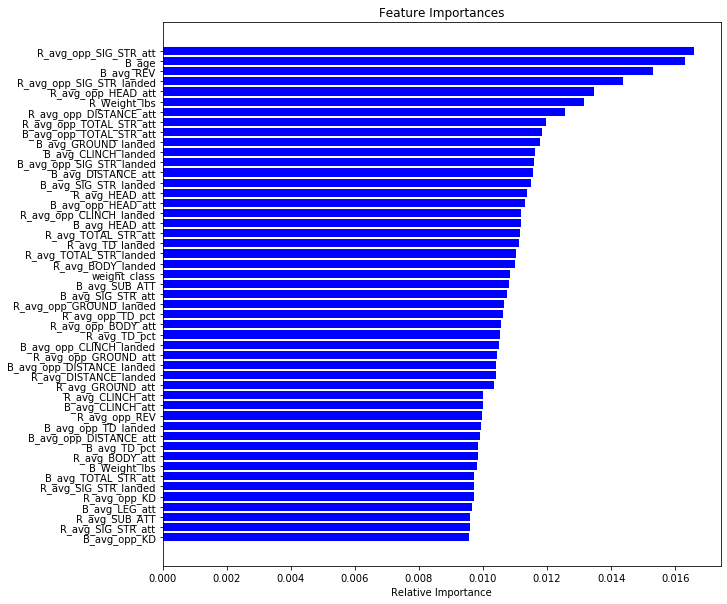

In [26]:
features = data1.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-49:]  # top 30 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [29]:
data2.head()

,Winner,weight_class,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,1,4,4.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,...,4.0,2.0,0.0,0.0,1,162.56,162.56,135.0,31.0,32.0
1,1,3,3.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,...,2.0,0.0,2.0,0.0,2,165.10,167.64,125.0,32.0,31.0
2,1,8,3.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,...,3.0,3.0,6.0,1.0,1,180.34,193.04,155.0,36.0,35.0
3,0,4,4.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,...,4.0,1.0,0.0,0.0,1,162.56,172.72,135.0,26.0,29.0
4,0,12,1.0,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,0.000000,...,1.0,2.0,0.0,0.0,2,187.96,190.50,264.0,32.0,26.0


In [28]:
data2.drop(columns=[ "title_bout"], inplace=True)

In [30]:
X=data2.drop('Winner',axis=1,inplace=False)
y = data2['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

In [31]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, random_state=1)

In [32]:
model.score(X_test, y_test)

0.6404833836858006

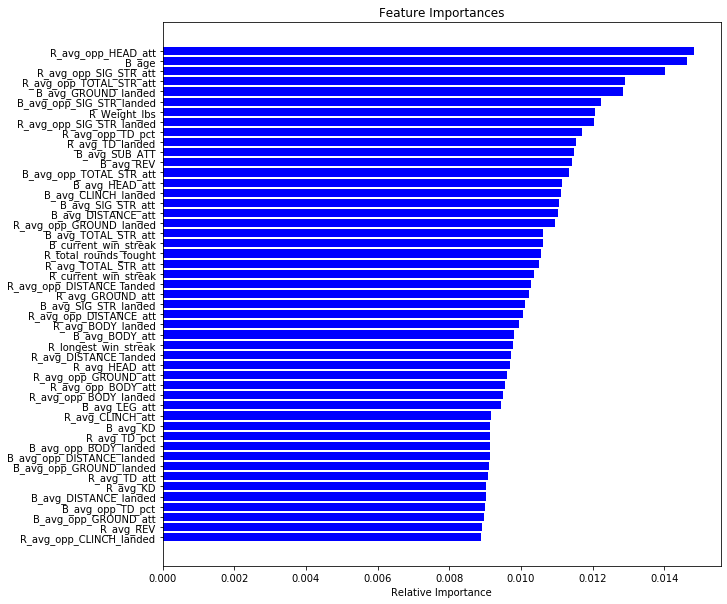

In [34]:
features = data2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-49:]  # top 30 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [35]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,12,15,17],
    'max_features': [5],
    'n_estimators': [100,300,500], 
    'criterion': ['gini', 'entropy']
}

In [36]:
model_sel = GridSearchCV(model,param_grid)

In [37]:
X=data1.drop('Winner',axis=1,inplace=False) # I applied the grid search to the second data set to see how are the best parameter
y = data1['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

In [38]:
model_sel.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=15, random_state=1),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 17], 'max_features': [5],
                         'n_estimators': [100, 300, 500]})

In [39]:
model_sel.best_estimator_.score(X_test, y_test)

0.6435045317220544

In [40]:
model_sel.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 5,
 'n_estimators': 500}

### Classification report

In [41]:
y_pred = model_sel.predict(X_test) #1=Red, 0=Blue

In [42]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.59      0.14      0.22       123
           1       0.65      0.94      0.77       208

    accuracy                           0.64       331
   macro avg       0.62      0.54      0.50       331
weighted avg       0.63      0.64      0.57       331



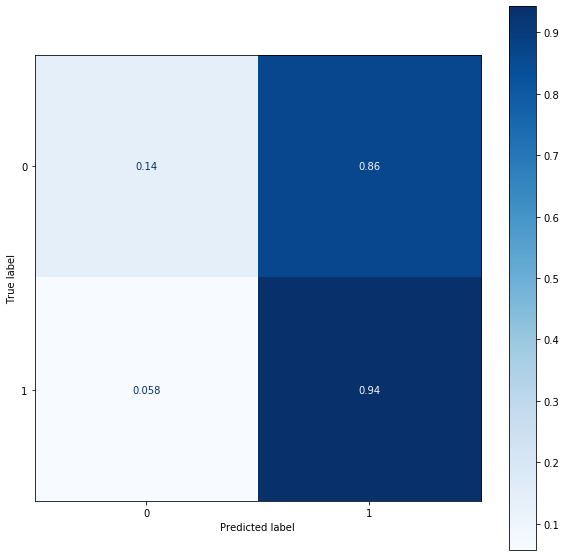

In [45]:
predictions = model_sel.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(model_sel, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')